In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from pylab import rcParams
#import matplotlib.pyplot as plt   
#import matplotlib.style
#plt.style.use('classic')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

## PROBLEM - 2 (LOGISTIC REGRESSION AND LDA)

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

#### Dataset for Problem 2: Holiday_Package.csv



### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [3]:
df_holi = pd.read_csv("C:\\Users\\archy\\Downloads\\Predictive Modelig\\Project\\Holiday_Package.csv")

In [4]:
df_holi.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


Variable Name	Description
Holiday_Package 	 Opted for Holiday Package yes/no?
Salary 	 Employee salary
age 	 Age in years
edu 	 Years of formal education
no_young_children 	 The number of young children (younger than 7 years)
no_older_children 	 Number of older children
foreign 	 foreigner Yes/No

In [5]:
df_holi.shape

(872, 8)

In [6]:
df_holi.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

**There are no null values in the dataset.**

In [7]:
df_holi.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [8]:
df_holi=df_holi.drop("Unnamed: 0",axis =1)

In [9]:
df_holi.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [10]:
df_holi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [11]:
df_holi.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [12]:
df_holi.no_young_children.value_counts().sort_index()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [13]:
df_holi.no_older_children.value_counts().sort_index()

0    393
1    198
2    208
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

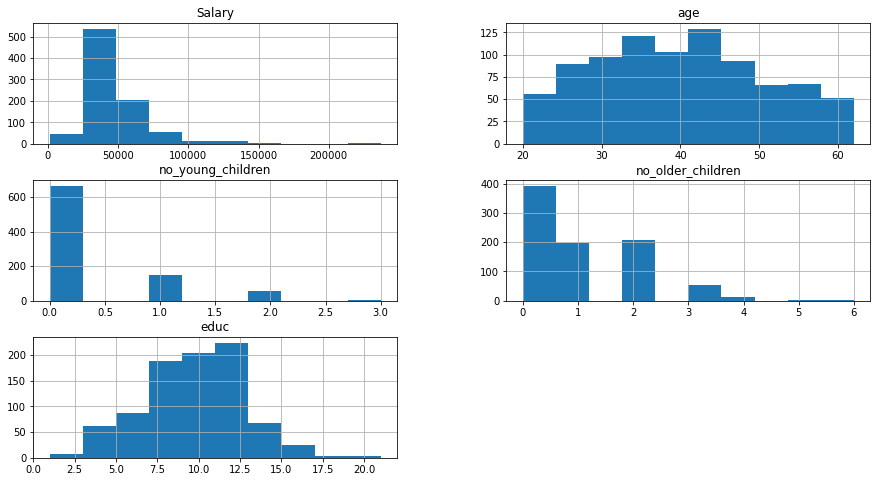

In [14]:

rcParams['figure.figsize'] = 15,8
df_holi[['Holliday_Package','Salary','age','no_young_children','no_older_children','foreign','educ']].hist();

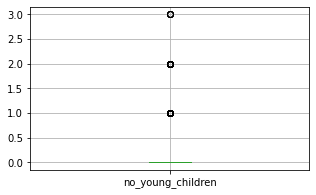

In [15]:
plt.figure(figsize=(5,3))

df_holi.boxplot(column=['no_young_children'])
plt.show()

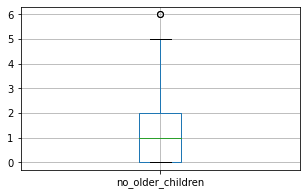

In [16]:
plt.figure(figsize=(5,3))

df_holi.boxplot(column=['no_older_children'])
plt.show()

* ***Even if we see that there are outliers in the bove features, they cannot be treated as they are in age column, and here '0' means that some employee do not have kid at all. if we remove utliers then these '0' will be gone.***
* ***hence we will no treat outlies in variable no_young_children and no_older_children***

### Bivariate and multivariate data analysis

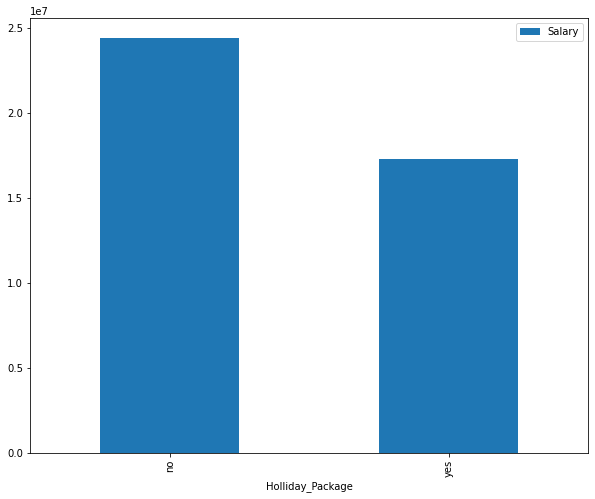

In [17]:
df_holi.groupby(by=['Holliday_Package'])['Salary'].sum().reset_index().sort_values(['Holliday_Package']).plot(x='Holliday_Package', y='Salary',kind='bar',figsize=(10,8))
plt.show()

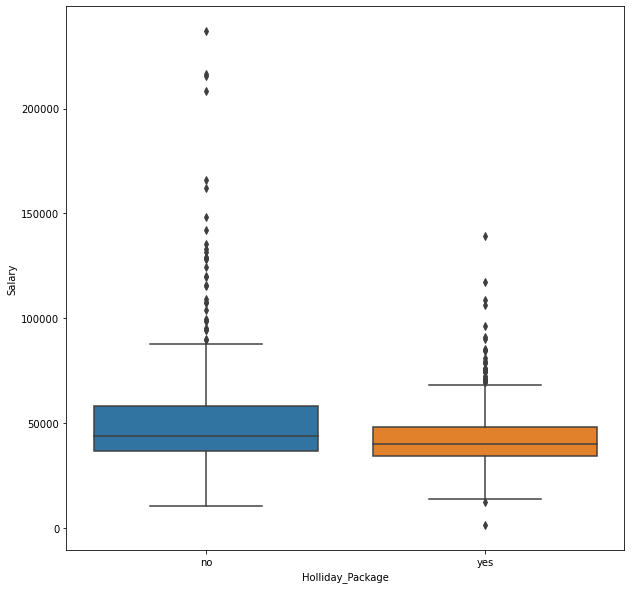

In [18]:
plt.figure(figsize=(10,10))
sns.boxplot(df_holi['Holliday_Package'],df_holi['Salary']);

**Above bar plot shows the number of packages taken by employees at certain income.**


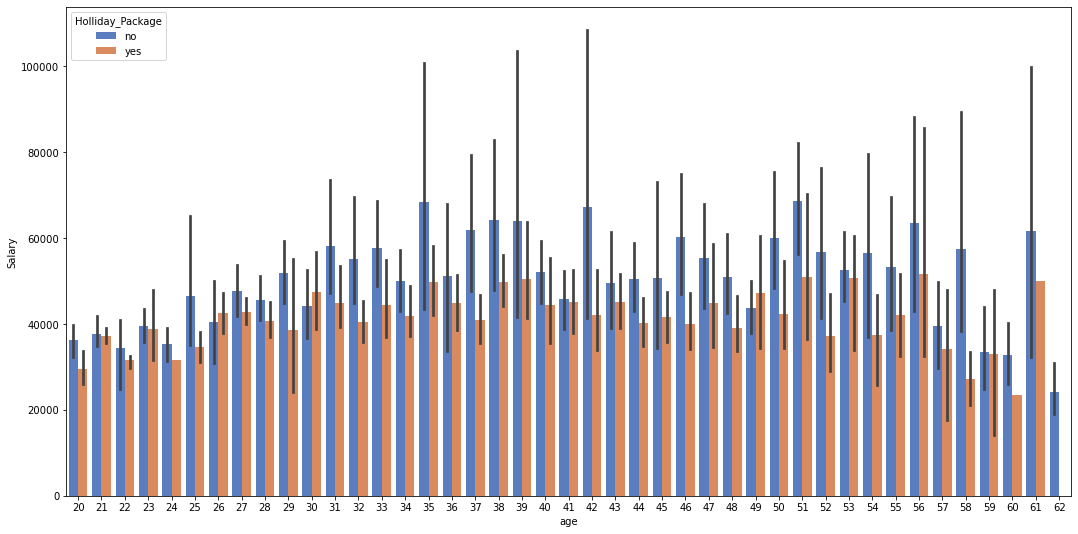

In [19]:
#Performaing the bivariabte anlysis with few variables.
plt.figure(figsize=(18,9))  
ax = sns.barplot(x='age', y='Salary', data=df_holi, hue='Holliday_Package',palette='muted') 

* In th above plot we can see the compairision with the salary and holoday package with their age criteria.

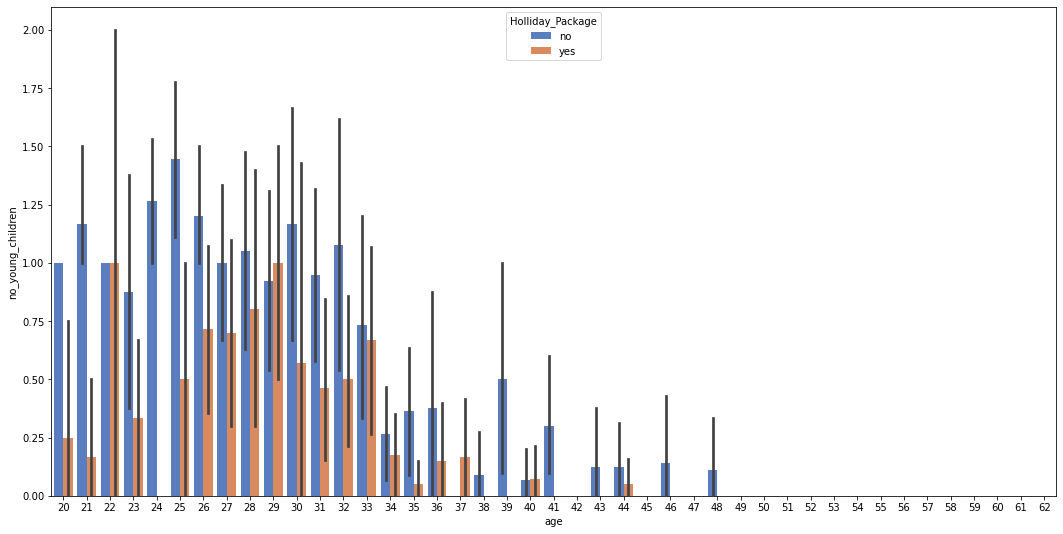

In [20]:
plt.figure(figsize=(18,9))  # setting the figure size
ax = sns.barplot(x='age', y='no_young_children', data=df_holi, hue='Holliday_Package',palette='muted')  # barplot

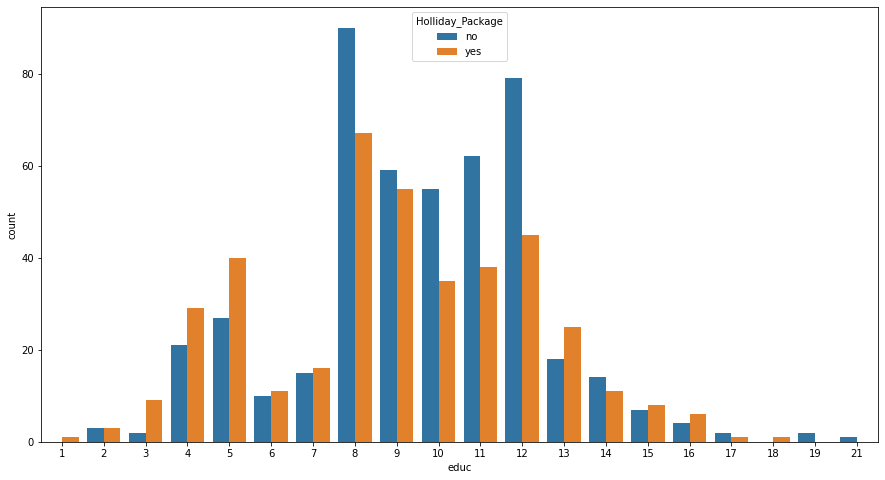

In [21]:
sns.countplot(df_holi['educ'],hue=df_holi['Holliday_Package']);


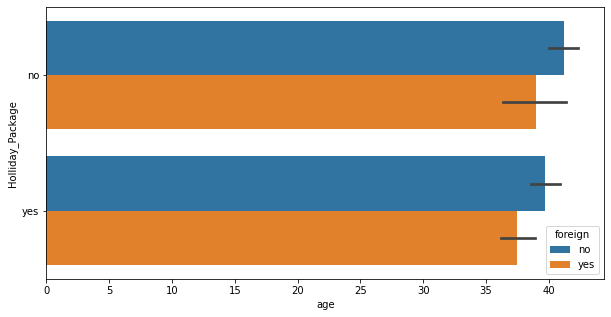

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_holi,x='age',y='Holliday_Package',hue='foreign')
plt.show()

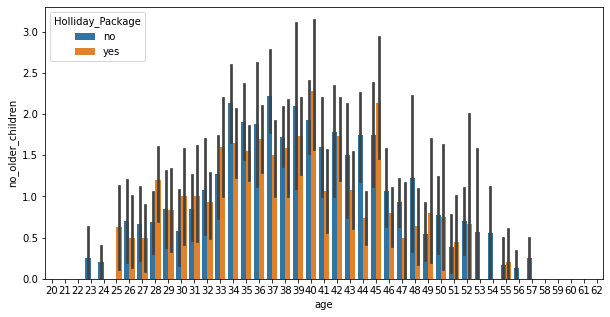

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_holi,x='age',y='no_older_children',hue='Holliday_Package')
plt.show()

cols = ['age','no_young_children','no_older_children','Salary','educ']
for i in cols:
    sns.boxplot(df_holi[i],whis=1.5)
    plt.show();

<AxesSubplot:>

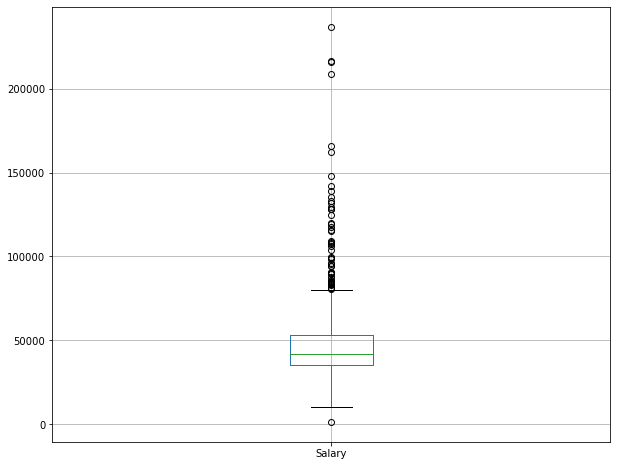

In [24]:
plt.figure(figsize=(10,8))
df_holi[['Salary']].boxplot()

**

<AxesSubplot:>

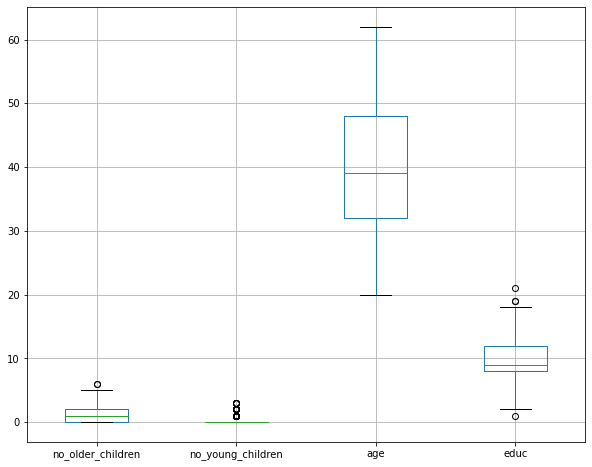

In [25]:
plt.figure(figsize=(10,8))
df_holi[['no_older_children','no_young_children','age','educ']].boxplot()

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

    lrincome,urincome=remove_outlier(df_holi['educ'])
df_holi['educ']=np.where(df_holi['educ']>urincome,urincome,df_holi['educ'])
df_holi['educ']=np.where(df_holi['educ']<lrincome,lrincome,df_holi['educ'])

lrincome,urincome=remove_outlier(df_holi['age'])
df_holi['age']=np.where(df_holi['age']>urincome,urincome,df_holi['age'])
df_holi['age']=np.where(df_holi['age']<lrincome,lrincome,df_holi['age'])

In [27]:
lrsalary,ursalary=remove_outlier(df_holi['Salary'])
df_holi['Salary']=np.where(df_holi['Salary']>ursalary,ursalary,df_holi['Salary'])
df_holi['Salary']=np.where(df_holi['Salary']<lrsalary,lrsalary,df_holi['Salary'])


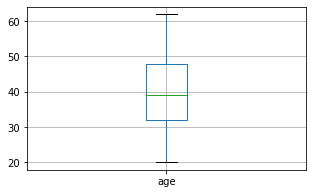

In [28]:
plt.figure(figsize=(5,3))

df_holi.boxplot(column=['age'])
plt.show()

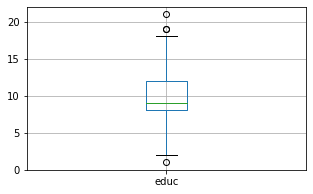

In [29]:
plt.figure(figsize=(5,3))

df_holi.boxplot(column=['educ'])
plt.show()

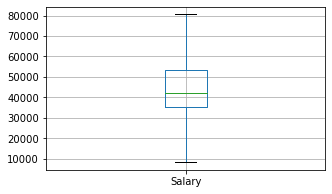

In [30]:
plt.figure(figsize=(5,3))

df_holi.boxplot(column=['Salary'])
plt.show()

In [32]:
dups = df_holi.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [33]:
df_holi.drop_duplicates(inplace=True) 


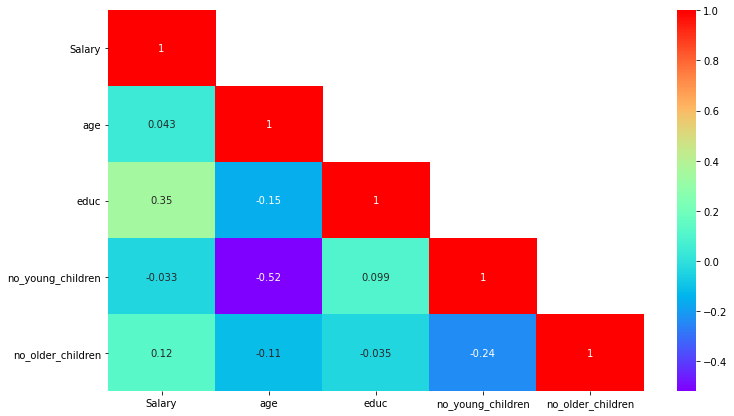

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(df_holi.corr(), annot=True,cmap='rainbow',mask=np.triu(df_holi.corr(),+1));

**Threr is co-rrelation between age and number of young children and another correlation is between education and salary.**

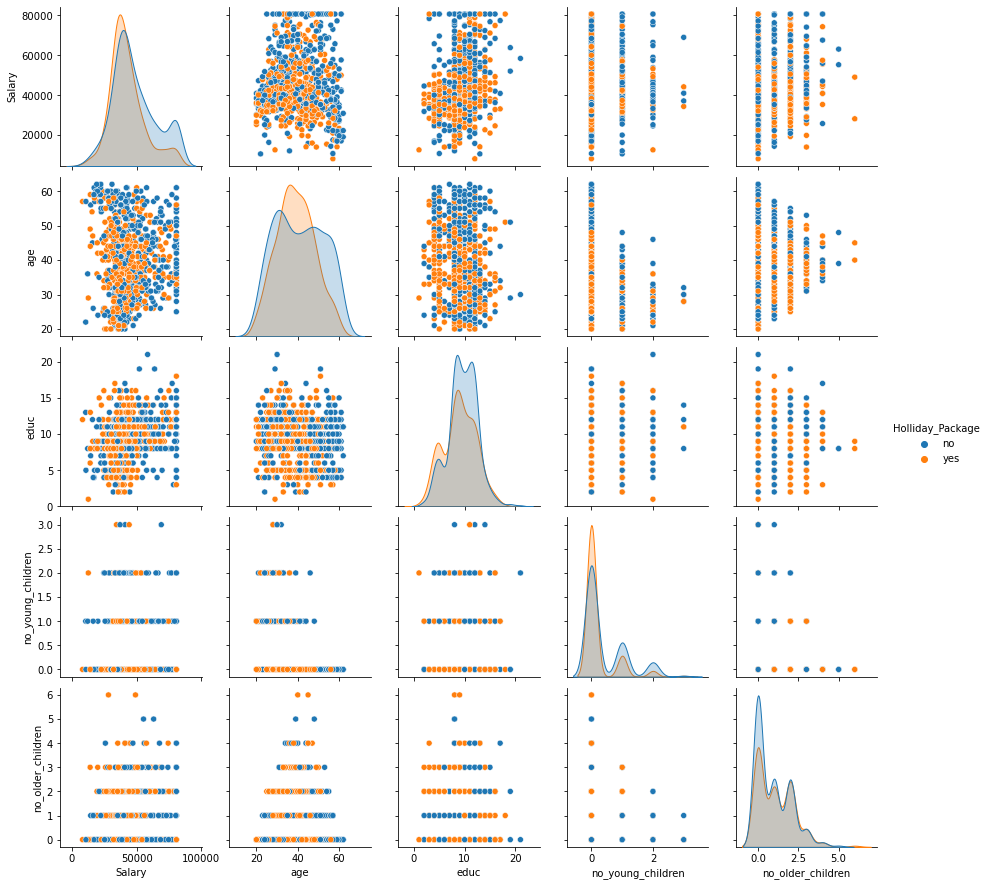

In [35]:
sns.pairplot(df_holi , hue='Holliday_Package' , diag_kind = 'kde')

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [36]:
for feature in df_holi.columns: 
    if df_holi[feature].dtype == 'object':
        df_holi[feature] = pd.Categorical(df_holi[feature]).codes 

In [37]:
df_holi.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [38]:
df_holi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   871 non-null    int8   
 1   Salary             871 non-null    float64
 2   age                871 non-null    int64  
 3   educ               871 non-null    int64  
 4   no_young_children  871 non-null    int64  
 5   no_older_children  871 non-null    int64  
 6   foreign            871 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 42.5 KB


In [39]:
X= df_holi.drop("Holliday_Package",axis=1)
Y=df_holi.pop("Holliday_Package")

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.30,random_state =1,stratify=Y)

In [41]:
print('Training set shape for the independent variables:',X_train.shape)
print('Training set shape for the dependent variable:',Y_train.shape)
print('Testing set shape for the independent variables:',X_test.shape)
print('Testing set shape for the dependent variable:',Y_test.shape)

Training set shape for the independent variables: (609, 6)
Training set shape for the dependent variable: (609,)
Testing set shape for the independent variables: (262, 6)
Testing set shape for the dependent variable: (262,)


In [42]:
log_reg_model = LogisticRegression(max_iter=10000,penalty = 'l2',solver='newton-cg',verbose=True, n_jobs=4)
lin_dis_model = LinearDiscriminantAnalysis()


In [43]:
log_reg_model.fit(X_train, Y_train)
lin_dis_model.fit(X_train,Y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    3.3s finished


LinearDiscriminantAnalysis()

In [44]:
predict_lda_train=lin_dis_model.predict(X_train)
predict_lda_test=lin_dis_model.predict(X_test)

In [45]:
y_train_predict = log_reg_model.predict(X_train)
y_test_predict = log_reg_model.predict(X_test)

In [46]:
ytrain_predict_prob=log_reg_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.654483,0.345517
1,0.190244,0.809756
2,0.768977,0.231023
3,0.898489,0.101511
4,0.789418,0.210582


In [47]:
ytest_predict_prob=log_reg_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.540387,0.459613
1,0.484066,0.515934
2,0.977280,0.022720
3,0.205763,0.794237
4,0.445551,0.554449


## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

### Marices

In [49]:
lr_acc_train=log_reg_model.score(X_train, Y_train)
lr_acc_train

0.6633825944170771

In [50]:
lr_acc_test=log_reg_model.score(X_test,Y_test)
lr_acc_test

0.6564885496183206

In [51]:
confusion_matrix(Y_train,y_train_predict)

array([[246,  83],
       [122, 158]], dtype=int64)

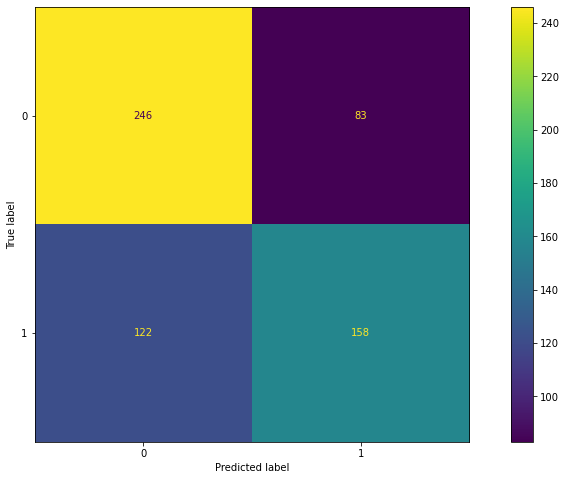

In [52]:

plot_confusion_matrix(log_reg_model,X_train, Y_train);

In [53]:
print(classification_report(Y_train, y_train_predict),'\n')

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.56      0.61       280

    accuracy                           0.66       609
   macro avg       0.66      0.66      0.66       609
weighted avg       0.66      0.66      0.66       609
 



In [54]:
confusion_matrix(Y_test, y_test_predict)

array([[108,  33],
       [ 57,  64]], dtype=int64)

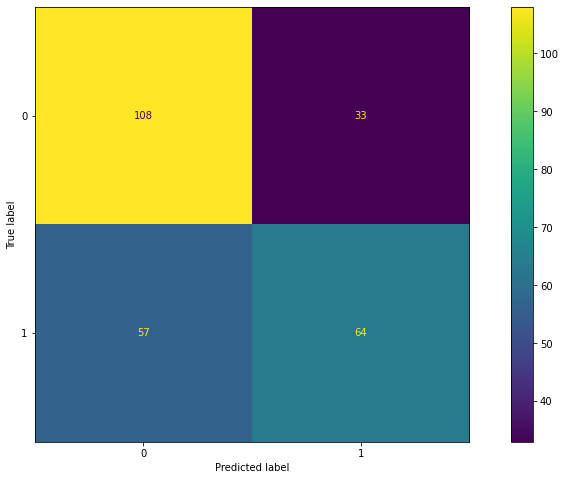

In [55]:
plot_confusion_matrix(log_reg_model,X_test,Y_test)

In [56]:
print(metrics.classification_report(Y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       141
           1       0.66      0.53      0.59       121

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262



In [57]:
log_reg_train=classification_report(Y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(log_reg_train).transpose()
log_reg_train_precision=round(df.loc["1"][0],2)
log_reg_train_recall=round(df.loc["1"][1],2)
log_reg_train_f1=round(df.loc["1"][2],2)
print ('log_reg_train_precision ',log_reg_train_precision)
print ('log_reg_train_recall ',log_reg_train_recall)
print ('log_reg_train_f1 ',log_reg_train_f1)

log_reg_train_precision  0.66
log_reg_train_recall  0.56
log_reg_train_f1  0.61


In [58]:
log_reg_test=classification_report(Y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(log_reg_test).transpose()
log_reg_test_precision=round(df.loc["1"][0],2)
log_reg_test_recall=round(df.loc["1"][1],2)
log_reg_test_f1=round(df.loc["1"][2],2)
print ('log_reg_test_precision ',log_reg_test_precision)
print ('log_reg_test_recall ',log_reg_test_recall)
print ('log_reg_test_f1 ',log_reg_test_f1)

log_reg_test_precision  0.66
log_reg_test_recall  0.53
log_reg_test_f1  0.59


### Applying GridSearch

In [59]:
grid={'penalty':['l2','none'],
      'solver':['sag','saga','lbfgs','newton-cg'],
      'tol':[0.001,0.0001,0.00001],
     'max_iter':[1000,10000]}

In [60]:
log_reg_model = LogisticRegression()

In [61]:
grid_search = GridSearchCV(estimator = log_reg_model, param_grid = grid, verbose=2, cv = 5,n_jobs=4,scoring='f1')

In [62]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 202 tasks      | elapsed:   26.0s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   31.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'max_iter': [1000, 10000], 'penalty': ['l2', 'none'],
                         'solver': ['sag', 'saga', 'lbfgs', 'newton-cg'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1', verbose=2)

In [63]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg', tol=0.001)


In [64]:
best_model = grid_search.best_estimator_

In [65]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [66]:
ytraingrid_predict_prob=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.654483,0.345517
1,0.190244,0.809756
2,0.768977,0.231023
3,0.898489,0.101511
4,0.789418,0.210582


In [67]:
ytestgrid_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.540387,0.459613
1,0.484066,0.515934
2,0.977280,0.022720
3,0.205763,0.794237
4,0.445551,0.554449


In [68]:
confusion_matrix(Y_train, ytrain_predict)

array([[246,  83],
       [122, 158]], dtype=int64)

In [69]:
print(classification_report(Y_train, ytrain_predict),'\n')

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.56      0.61       280

    accuracy                           0.66       609
   macro avg       0.66      0.66      0.66       609
weighted avg       0.66      0.66      0.66       609
 



In [70]:
print(classification_report(Y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       141
           1       0.66      0.53      0.59       121

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262
 



In [71]:
confusion_matrix(Y_test, ytest_predict)


array([[108,  33],
       [ 57,  64]], dtype=int64)

AUC for the Training Data: 0.734
AUC for the Test Data: 0.708


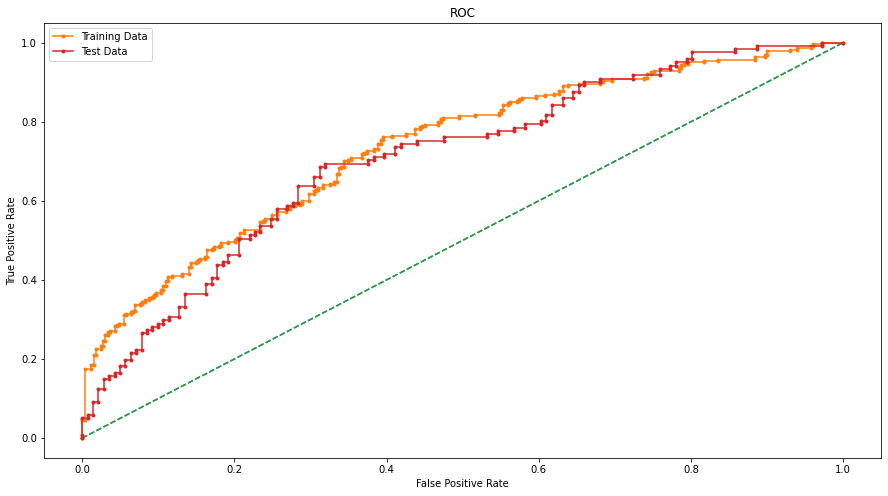

In [72]:
# calculate AUC
auc_lr_train = metrics.roc_auc_score(Y_train,ytraingrid_predict_prob[:,1])
print('AUC for the Training Data: %.3f' % auc_lr_train)

fpr, tpr, thresholds = metrics.roc_curve(Y_train,ytraingrid_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_lr_test = metrics.roc_auc_score(Y_test,ytestgrid_predict_prob[:,1])
print('AUC for the Test Data: %.3f' % auc_lr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ytestgrid_predict_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()


### LDA Model

In [73]:
lda_acc_train=lin_dis_model.score(X_train,Y_train)
lda_acc_train

0.6633825944170771

In [74]:
lda_acc_test=lin_dis_model.score(X_test,Y_test)
lda_acc_test

0.648854961832061

In [75]:
confusion_matrix(Y_train,predict_lda_train)

array([[245,  84],
       [121, 159]], dtype=int64)

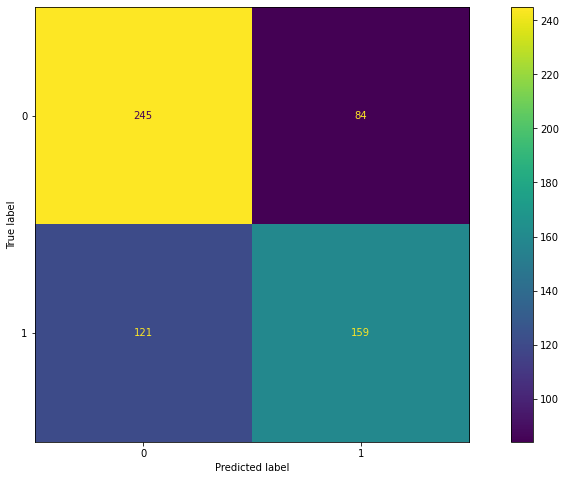

In [76]:
plot_confusion_matrix(lin_dis_model,X_train,Y_train);

In [77]:
print(classification_report(Y_train, predict_lda_train))


              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.65      0.57      0.61       280

    accuracy                           0.66       609
   macro avg       0.66      0.66      0.66       609
weighted avg       0.66      0.66      0.66       609



In [78]:
confusion_matrix(Y_test,predict_lda_test)

array([[108,  33],
       [ 59,  62]], dtype=int64)

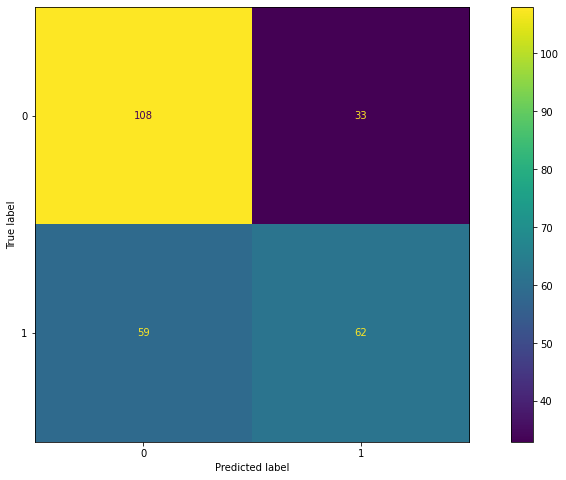

In [79]:
plot_confusion_matrix(lin_dis_model,X_test,Y_test);

In [80]:
print(classification_report(Y_test, predict_lda_test))


              precision    recall  f1-score   support

           0       0.65      0.77      0.70       141
           1       0.65      0.51      0.57       121

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [81]:
lda_train=classification_report(Y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lda_train).transpose()
lda_train_precision=round(df.loc["1"][0],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_f1=round(df.loc["1"][2],2)
print ('lda_precision train ',lda_train_precision)
print ('lda_recall train',lda_train_recall)
print ('lda_train_f1 train',lda_train_f1)

lda_precision train  0.66
lda_recall train 0.56
lda_train_f1 train 0.61


In [82]:
lda_test=classification_report(Y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lda_test).transpose()
lda_test_precision=round(df.loc["1"][0],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_f1=round(df.loc["1"][2],2)
#lda_test_acc=round(df.loc["3"][2],2)
print ('lda_precision test ',lda_test_precision)
print ('lda_recall test',lda_test_recall)
print ('lda_train_f1 test',lda_test_f1)
#print ('lda_test_acc test',lda_test_acc)


lda_precision test  0.66
lda_recall test 0.53
lda_train_f1 test 0.59


### Probability Prediction on train and test data

In [83]:
predlda_prob_train = lin_dis_model.predict_proba(X_train)
predlda_prob_test = lin_dis_model.predict_proba(X_test)

AUC for the Training Data: 0.733
AUC for the Test Data: 0.708


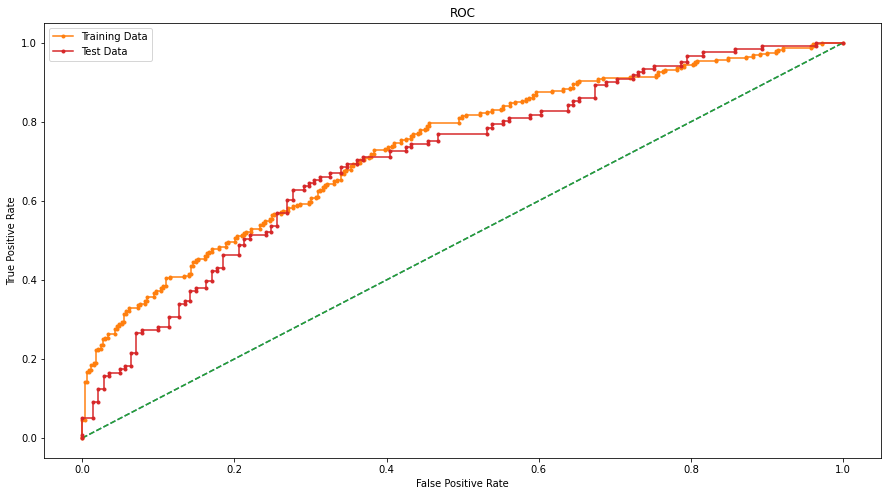

In [84]:
# calculate AUC
auc_lda_train = metrics.roc_auc_score(Y_train,predlda_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc_lda_train)

fpr, tpr, thresholds = metrics.roc_curve(Y_train,predlda_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
auc_lda_test = metrics.roc_auc_score(Y_test,predlda_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc_lda_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
fpr, tpr, thresholds = metrics.roc_curve(Y_test,predlda_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()


***0.4 gives the best accuracy and f1 score, hence we can take cut off as 0.4***

In [85]:
index=['Accuracy', 'Area Under Curv', 'Precision','recall','F1 Score']
data = pd.DataFrame({'Logistic Regression Train':[lr_acc_train,auc_lr_train,log_reg_train_precision,log_reg_train_recall,log_reg_train_f1],
        'Logistic Regression Test':[lr_acc_test,auc_lr_test,log_reg_test_precision,log_reg_test_recall,log_reg_test_f1],
       'Linear Discriminent analysis Train':[lda_acc_train,auc_lda_train,lda_train_precision,lda_train_recall,lda_train_f1],
        'Linear Discriminent analysis Test':[lda_acc_test,auc_lda_test,lda_test_precision,lda_test_recall,lda_test_f1]},index=index)
round(data,2)

,Logistic Regression Train,Logistic Regression Test,Linear Discriminent analysis Train,Linear Discriminent analysis Test
Accuracy,0.66,0.66,0.66,0.65
Area Under Curv,0.73,0.71,0.73,0.71
Precision,0.66,0.66,0.66,0.66
recall,0.56,0.53,0.56,0.53
F1 Score,0.61,0.59,0.61,0.59


**on the basis of accuracy both the models perfomance is similar**.

****F1 score on the train dataset is same on both models and F1 score on test dataset on both model is same****

**accuracy and AUC on both models too is similar on train and test data.***

**Hence we can say that both the model are perfoming very well on test data.**

## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

***•On the basis of both the models, explaining the dependent variable price can be possible.***

***•	Decisions of selling the holiday packages to the employees at different levels of age group or at different levels of education years can be made****

***•	Model accuracy score at 66% can give the assurance that these are the factors which are playing the role in making the decision for buying the holiday packages.***

# END